In [1]:
import _init_paths
import numpy as np
import nengo
import consts.dir_consts as drc
from src.frozen_lake.train_actor_critic import get_network
from utils.frozen_lake_utils import FrozenLakeUtils

import matplotlib.pyplot as plt
import pickle

RES_DIR = drc.RESULTS_DIR+"/frozen_lake_task/"

2022-05-06 22:55:43.057871: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-06 22:55:43.058091: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gra287): /proc/driver/nvidia/version does not exist


# Run the Agent

In [2]:
net = get_network("4x4")
sim = nengo.Simulator(net)
sim.run(20)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

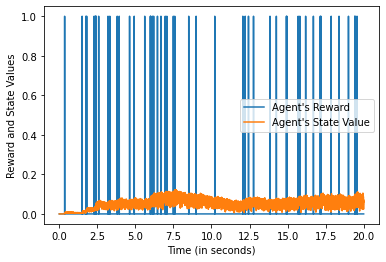

In [3]:
plt.plot(sim.trange(), sim.data[net.probe_reward], label="Agent's Reward")
plt.plot(sim.trange(), sim.data[net.probe_value], label="Agent's State Value")
plt.xlabel("Time (in seconds)")
plt.ylabel("Reward and State Values")
plt.legend()

In [4]:
# Run the Actor-Critic model for next 300 secs.
sim.run(280) # Execute for 300 seconds.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [5]:
pickle.dump(sim.data[net.probe_done],
              open(drc.RESULTS_DIR+"/frozen_lake_task/task_done.p", "wb"))
pickle.dump(sim.data[net.probe_value],
              open(drc.RESULTS_DIR+"/frozen_lake_task/critic_values.p", "wb"))
pickle.dump(sim.data[net.probe_reward],
              open(drc.RESULTS_DIR+"/frozen_lake_task/actor_rewards.p", "wb"))
pickle.dump(sim.data[net.probe_choice],
              open(drc.RESULTS_DIR+"/frozen_lake_task/actor_act_choices.p", "wb"))
pickle.dump(sim.data[net.probe_raw_actions],
              open(drc.RESULTS_DIR+"/frozen_lake_task/actor_raw_actions.p", "wb"))
pickle.dump(sim.trange(),
              open(drc.RESULTS_DIR+"/frozen_lake_task/sim_trange.p", "wb"))
pickle.dump(sim.data[net.probe_state],
            open(drc.RESULTS_DIR+"/frozen_lake_task/env_states.p", "wb"))

In [2]:
actor_raw_actions = pickle.load(open(RES_DIR+"run_3/actor_raw_actions.p", "rb"))
actor_action_choices = pickle.load(open(RES_DIR+"run_3/actor_act_choices.p", "rb"))
critic_value = pickle.load(open(RES_DIR+"run_3/critic_values.p", "rb"))
actor_rewards = pickle.load(open(RES_DIR+"run_3/actor_rewards.p", "rb"))
sim_trange = pickle.load(open(RES_DIR+"run_3/sim_trange.p", "rb"))
task_done = pickle.load(open(RES_DIR+"run_3/task_done.p", "rb"))
env_states = pickle.load(open(RES_DIR+"run_3/env_states.p", "rb"))

# Agent's Reward

Text(0, 0.5, 'Reward Values')

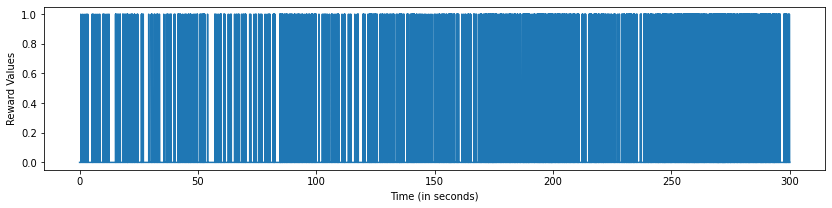

In [3]:
plt.figure(figsize=(14, 3))
plt.plot(sim_trange, actor_rewards)
plt.xlabel("Time (in seconds)")
plt.ylabel("Reward Values")

In [4]:
env_states[-10:], actor_raw_actions[-10:]

(array([[ 2.],
        [ 3.],
        [ 3.],
        [ 7.],
        [ 4.],
        [ 8.],
        [ 9.],
        [10.],
        [ 6.],
        [ 5.]]),
 array([[-0.71893807,  0.11705883,  0.75799972, -0.15612047],
        [-0.84865795,  0.17212009,  0.86579225, -0.18925439],
        [-0.77920616,  0.13814664,  0.81224421, -0.17118469],
        [-0.83220234,  0.16127959,  0.85631037, -0.18538762],
        [-0.85911355,  0.15431691,  0.89291432, -0.18811768],
        [-0.85557887,  0.17184062,  0.87564588, -0.19190763],
        [-0.91318794,  0.16713559,  0.94663735, -0.20058499],
        [-0.89879803,  0.17900103,  0.91955068, -0.19975368],
        [-0.93898108,  0.1779644 ,  0.97144407, -0.2104274 ],
        [-0.92825599,  0.18474583,  0.94888852, -0.20537836]]))

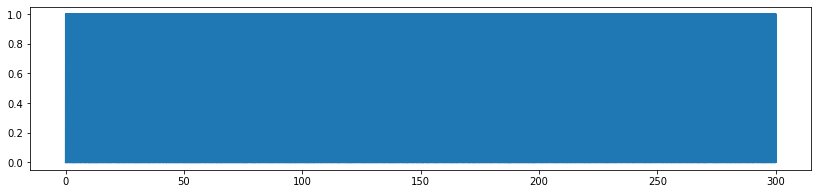

In [26]:
plt.figure(figsize=(14, 3))
plt.plot(sim_trange, task_done)

# Agent's Raw Actions

In [27]:
actor_raw_actions[-10:]

array([[-0.75235403,  0.49614844,  1.16761154, -0.91140595],
       [-0.80452841,  0.52198962,  1.26037159, -0.9778328 ],
       [-0.7685201 ,  0.50182333,  1.19837488, -0.93167812],
       [-0.79891716,  0.51970961,  1.24248554, -0.96327799],
       [-0.79734378,  0.52330109,  1.23545315, -0.96141046],
       [-0.68626064,  0.44134683,  1.08476599, -0.83985218],
       [-0.84524879,  0.55662107,  1.30900272, -1.02037501],
       [-0.69992678,  0.4583871 ,  1.09128913, -0.84974945],
       [-0.78270458,  0.503217  ,  1.22594279, -0.9464552 ],
       [-0.76613967,  0.50575623,  1.19023558, -0.92985214]])

# ###################################################

In [15]:
for i in range(250000, 300000):
  if actor_rewards[i]==1:
    print(actor_rewards[i], task_done[i])

[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]
[1.] [1.]


In [2]:
fl_utils = FrozenLakeUtils("4x4")
state_action_map = fl_utils.get_policy(1, 250)

In [3]:
np.mean(state_action_map[0], axis=0)

array([-0.24951063,  0.07503003,  0.21874457, -0.04426397])

In [4]:
state_action_map = fl_utils.get_policy(1, 250, cherry_pick_wins=True)

np.mean(state_action_map[0], axis=0)

array([-0.60834464,  0.24328592,  0.59246758, -0.22740887])

In [7]:
for key in state_action_map:
  print(key, np.mean(state_action_map[key], axis=0))

15.0 [-0.77228409  0.31881228  0.74657085 -0.29309904]
14.0 [-0.75465656  0.3096995   0.72467257 -0.27971551]
10.0 [-0.70784503  0.29046058  0.6823316  -0.26494715]
6.0 [-0.64763526  0.26756898  0.61388516 -0.23381888]
2.0 [-0.57586616  0.23042181  0.5488874  -0.20344305]
1.0 [-0.60049202  0.23973254  0.57589998 -0.2151405 ]
9.0 [-0.70520144  0.29851484  0.67382802 -0.26714142]
8.0 [-0.69890004  0.29026617  0.67639674 -0.26776287]
4.0 [-0.63896571  0.25696844  0.61912625 -0.23712898]
0.0 [-0.60834464  0.24328592  0.59246758 -0.22740887]
13.0 [-0.74216571  0.31116409  0.70051987 -0.26951825]
3.0 [-0.62987166  0.27901792  0.63048512 -0.27963138]


# ###################################################

In [53]:
import gym
env = gym.make("FrozenLake-v1", is_slippery=False)

In [54]:
a = env.reset()